In [2]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [3]:
import yfinance as yf

# Download TSLA data from 2018-01-01 to 2025-04-30
df_googl = yf.download(
    "GOOGL", 
    start="2018-07-25", 
    end="2020-06-10"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_googl.reset_index(inplace=True)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:



# Save the DataFrame as a CSV file in the correct folder
df_googl.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\GOOGL_historical_data.csv", index=False)


In [5]:
print("Null values count per column:")
print(df_googl.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64


In [6]:
df_googl.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,472,472.000000,472.000000,472.000000,472.000000,4.720000e+02
mean,2019-07-02 02:08:08.135593216,60.427036,61.019826,59.770228,60.398485,3.639782e+07
min,2018-07-25 00:00:00,48.999237,50.365204,48.650403,48.981819,1.280200e+07
25%,2019-01-13 06:00:00,55.762280,56.421501,55.207554,55.739140,2.515850e+07
50%,2019-07-02 12:00:00,59.668728,60.084988,59.151701,59.679179,3.160500e+07
75%,2019-12-18 06:00:00,63.586742,64.211011,62.874405,63.459103,4.222400e+07
max,2020-06-09 00:00:00,75.880714,76.172821,75.687144,75.996661,1.331780e+08
std,NaN,5.906840,5.843248,5.936367,5.873111,1.755042e+07


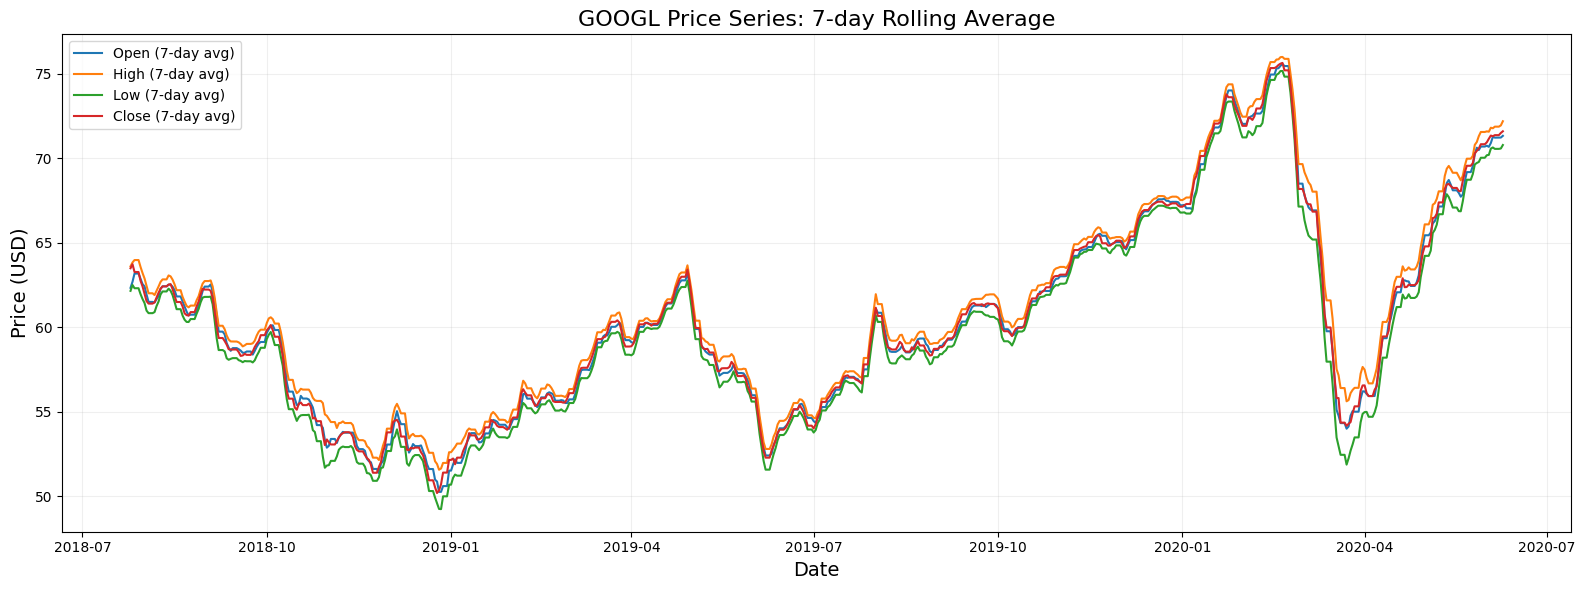

In [7]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_googl, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("GOOGL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [8]:
print(df_googl.columns)
print(df_googl.columns[df_googl.columns.duplicated()])
print(type(df_googl['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',      ''),
            ( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [9]:
df_googl.columns = ['_'.join([str(c) for c in col if c]) for col in df_googl.columns.values]
# Now 'Close_GOOGL', 'High_FXI', ...


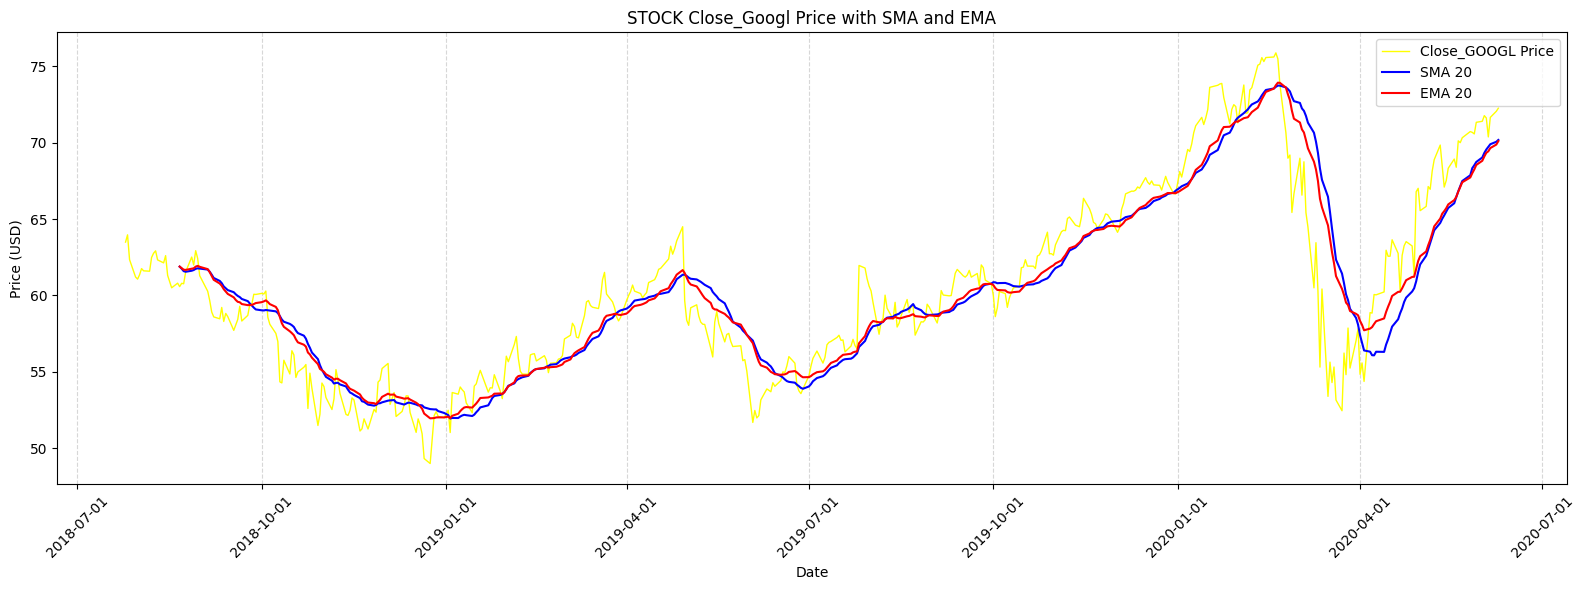

In [10]:
from src.plot_ma import plot_ma
plot_ma(df_googl, 'Close_GOOGL')

### Graph Interpretation: STOCK Close_Googl Price with SMA and EMA (2018-07 to 2020-07)

- **Date Range:** The chart spans from July 2018 to July 2020, covering two full years of GOOGL price activity.
- **Initial Period (Jul 2018 – Dec 2018):**  
  The GOOGL closing price and both moving averages (SMA and EMA) show a steady decline, with the price dropping from around $63 to near $53. This indicates a downtrend in the second half of 2018.
- **Early 2019:**  
  The price stabilizes, then begins to recover. All three lines turn upwards, signaling the start of a new uptrend. From Jan 2019 to April 2019, GOOGL steadily climbs, reaching around $60.
- **Mid-2019 (Apr – Oct 2019):**  
  The stock continues to rise with some short-term volatility. The SMA and EMA lines track this upward trend closely, confirming strong positive momentum.
- **Late 2019 to Early 2020:**  
  The uptrend accelerates, and GOOGL’s closing price peaks above $75 in early 2020. Both moving averages follow the sharp upward movement.
- **Spring 2020 (Feb – Apr 2020):**  
  There is a sudden and steep decline in the price, dropping from above $75 to below $60 in a short time—likely reflecting the market crash in March 2020 due to the COVID-19 pandemic. The EMA (red) responds more rapidly to this drop compared to the SMA (blue).
- **Recovery (Apr 2020 – Jul 2020):**  
  The stock quickly rebounds after the crash, with the closing price, SMA, and EMA all trending upward again, approaching previous highs by July 2020.

**Overall:**  
The graph shows several distinct trends—decline, recovery, strong growth, a sharp crash, and rapid recovery—over the two-year period. The SMA and EMA provide smoother views of these trends, with the EMA showing changes a bit earlier than the SMA.


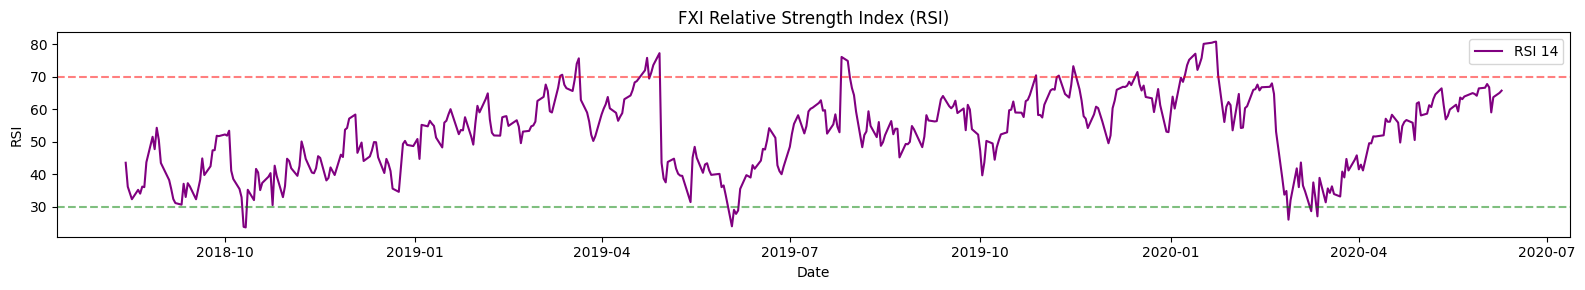

In [11]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_googl, price_col='Close_GOOGL', ticker_name='FXI')

### Graph Interpretation: FXI Relative Strength Index (RSI) (2018-07 to 2020-07)

- **Date Range:** This chart covers FXI’s RSI from July 2018 to July 2020.
- **2018 Q3–Q4:**  
  RSI fluctuated widely, frequently dipping near or below the 30 line (oversold). The index mostly stayed between 30 and 60, indicating mixed or weak momentum.
- **Early 2019:**  
  RSI moved mostly between 40 and 60, with a few brief drops near or below 30, suggesting continued periods of weakness or recovery attempts.
- **Mid-2019:**  
  The RSI spiked multiple times above 70 (overbought zone), especially around April–July 2019, indicating very strong upward momentum and potential price peaks.
- **Late 2019:**  
  RSI remained mostly elevated, often staying between 60 and 70. Occasional dips below 50 suggest minor pullbacks, but overall, momentum stayed strong.
- **Early 2020:**  
  The RSI again reached above 70 before experiencing a dramatic fall below 30 in March 2020—corresponding to the global COVID-19 market crash. This shows a rapid shift from overbought to heavily oversold conditions.
- **Recovery (Spring–Summer 2020):**  
  After the sharp drop, RSI recovered quickly, climbing back to the 60–70 range by mid-2020. This indicates a strong recovery and renewed bullish momentum in the FXI price.

**Summary:**  
Over this two-year period, the RSI for FXI shows distinct cycles of overbought (above 70) and oversold (below 30) conditions, sharp reversals around major market events (especially March 2020), and a strong recovery towards the end. The RSI frequently returned to the neutral 40–60 range between major moves, confirming periods of relative stability.


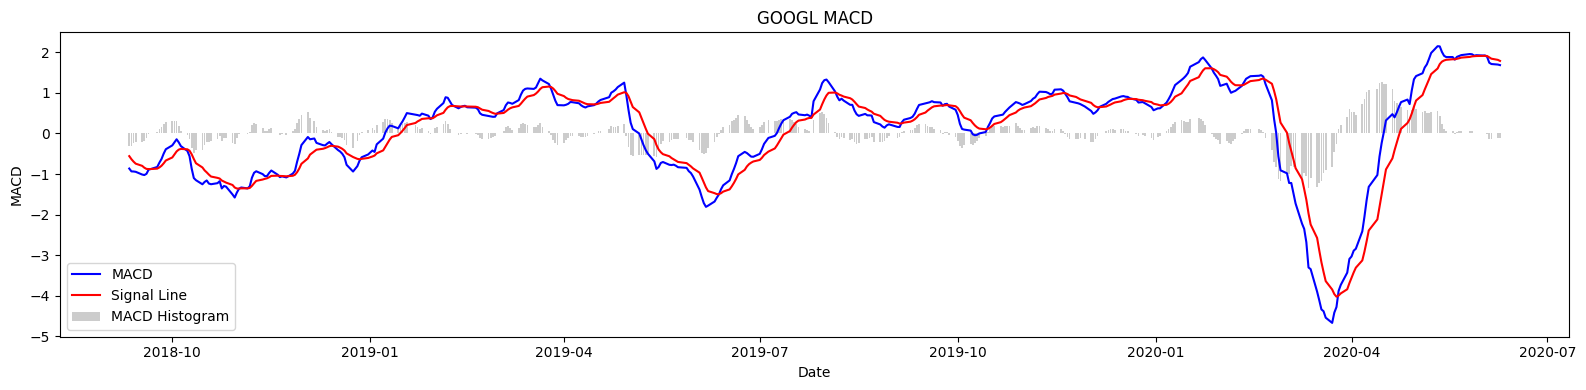

In [12]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_googl, price_col='Close_GOOGL', ticker_name='GOOGL')

### Graph Interpretation: GOOGL MACD (2018-07 to 2020-07)

- **Date Range:** The chart covers July 2018 to July 2020.
- **What’s shown:**  
  - **MACD line (blue):** Measures the difference between two exponential moving averages, showing trend strength and direction.
  - **Signal line (red):** A moving average of the MACD, used to generate trading signals.
  - **MACD Histogram (gray bars):** Shows the difference between the MACD and signal lines. Positive bars mean MACD is above the signal (bullish); negative bars mean MACD is below (bearish).

#### Key observations by period:

- **Late 2018:**  
  MACD was negative and below the signal line, confirming a downtrend.  
- **Early–Mid 2019:**  
  MACD crosses above the signal line several times, moving into positive territory around March–April 2019. These crossovers coincide with rising price momentum and the start of uptrends.
- **Late 2019:**  
  MACD remains mostly positive, with brief dips. This matches strong upward momentum in the underlying stock.
- **Early 2020:**  
  MACD rises sharply to its highest positive values, but then both MACD and signal lines collapse below zero around March 2020, indicating a sudden and strong downtrend—this aligns with the COVID-19 market crash.
- **Spring 2020 Recovery:**  
  After the deep drop, MACD rebounds quickly, moving above the signal line again and back into positive territory, indicating the start of a new uptrend.

**Summary:**  
The MACD chart reveals multiple trend shifts for GOOGL during this period, with major bullish crossovers (MACD crossing above the signal line) in early 2019 and spring 2020, and a significant bearish phase in March 2020. The histogram visually highlights periods of strong bullish or bearish momentum


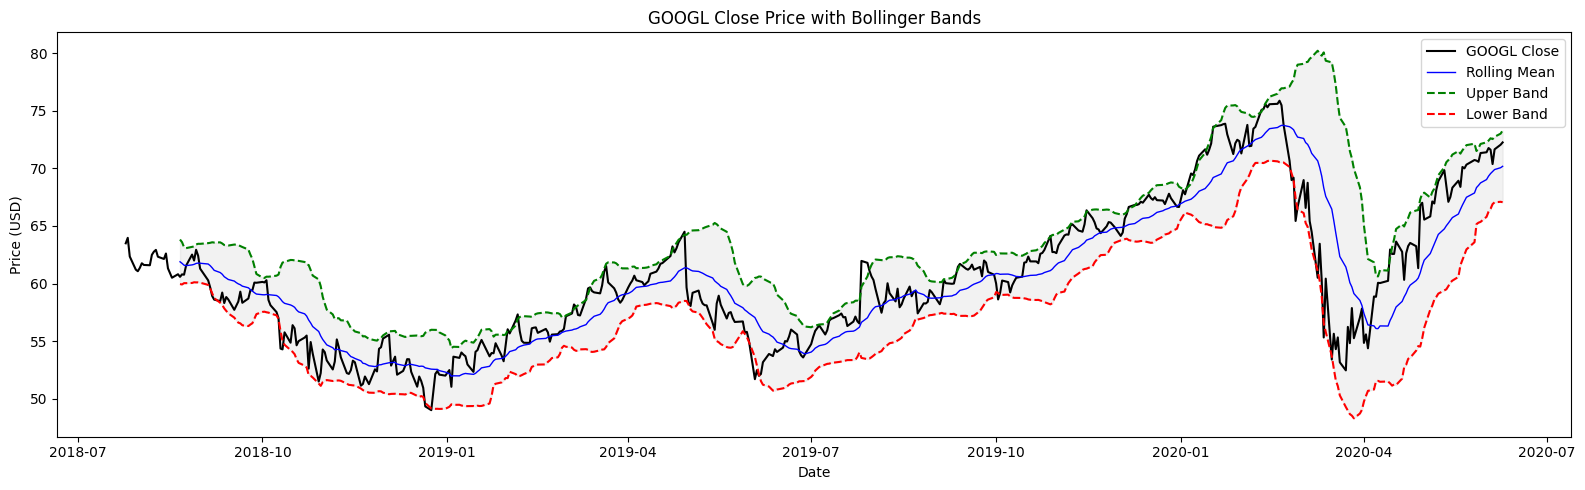

In [15]:
from src.plot_bolinger import plot_bollinger_bands

# Example usage (for AAPL)
plot_bollinger_bands(df_googl, column='Close_GOOGL', stock_name='GOOGL')

### Graph Interpretation: GOOGL Close Price with Bollinger Bands (2018-07 to 2020-07)

- **Date Range:** July 2018 to July 2020.
- **What’s shown:**
  - **Black line:** Daily closing price of GOOGL.
  - **Blue line:** Rolling mean (moving average), showing the smoothed price trend.
  - **Green dashed line:** Upper Bollinger Band (rolling mean + 2 standard deviations).
  - **Red dashed line:** Lower Bollinger Band (rolling mean - 2 standard deviations).

#### Observations by period:

- **Mid-2018 to End-2018:**  
  The closing price trends downward, often moving close to the lower band. This signals sustained weakness and sometimes oversold conditions.
- **Early 2019:**  
  The price stabilizes and starts to recover, bouncing between the bands and frequently touching or approaching the upper band during short rallies.
- **Mid-2019 to Early 2020:**  
  A clear uptrend emerges, with the price often riding the upper band, indicating strong momentum and persistent bullishness. The bands also widen, reflecting increased volatility during sharp upswings.
- **March 2020:**  
  A dramatic drop in price pushes the close below the lower band, suggesting a period of extreme selling and possible market panic (likely the COVID-19 crash).
- **Spring 2020 Recovery:**  
  The price rebounds rapidly, crosses the rolling mean, and climbs back towards the upper band. The bands widen and then start to narrow as volatility subsides.

#### Overall:

- When the closing price touches or exceeds the upper band, it often signals that the stock may be overbought or experiencing high momentum.
- When the closing price touches or falls below the lower band, it can signal oversold conditions or a market correction.
- The **width of the bands** increases during periods of high volatility (large price swings) and narrows when the market is calm.

**Summary:**  
The Bollinger Bands in this chart highlight periods of high and low volatility for GOOGL stock, and help to identify when the price is unusually high or low relative to its recent average. In this two-year window, GOOGL experienced extended trends, sharp reversals, and periods where price moved outside the bands, often preceding a reversal or rapid recovery.


In [18]:
df = df_googl.rename(columns={
    'High_GOOGL': 'High',
    'Close_GOOGL': 'Close',
    'Low_GOOGL': 'Low',
    'Open_GOOGL': 'Open'
})


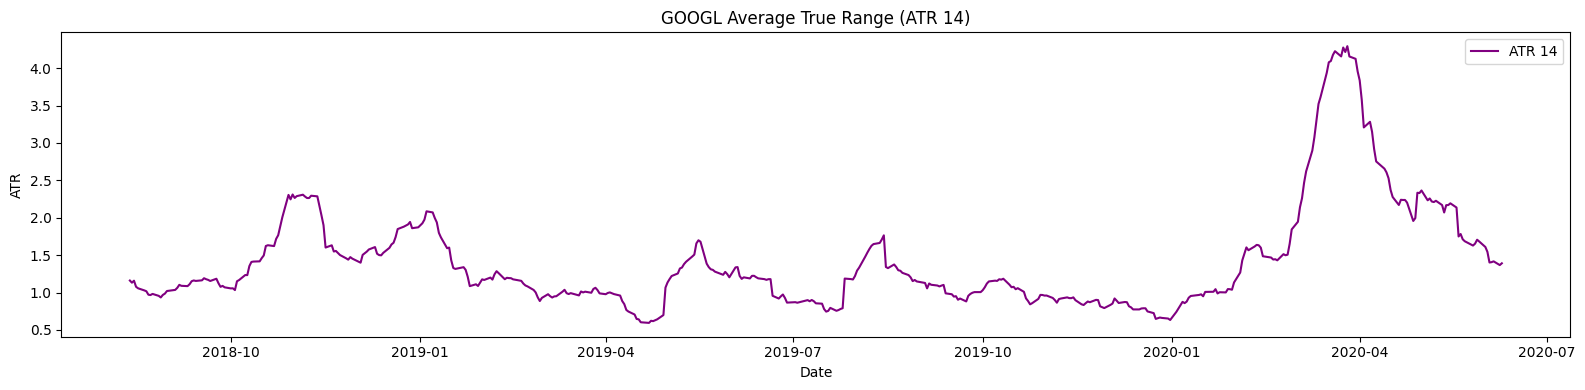

In [19]:
from src.ATR import plot_atr

# For Apple (AAPL)
plot_atr(df, window=14, stock_name='GOOGL')

### Graph Interpretation: GOOGL Average True Range (ATR 14) (2018-07 to 2020-07)

- **Date Range:** July 2018 to July 2020.
- **What’s shown:**  
  The purple line represents the 14-day Average True Range (ATR), a measure of market volatility for GOOGL. Higher ATR values indicate more volatility; lower values indicate calmer periods.

#### Observations by period:

- **Mid-2018 to Early 2019:**  
  ATR fluctuates between 1.0 and 2.5, with periodic spikes. These spikes suggest short bursts of higher price movement or volatility, followed by returns to a steadier state.
- **Mid-2019 to End-2019:**  
  Volatility generally stays below 1.5, indicating a relatively calm market. Small, brief increases correspond to minor corrections or rallies.
- **Early 2020:**  
  The ATR begins to rise sharply, peaking above 4.0 around March 2020. This spike corresponds to the dramatic market swings caused by the COVID-19 pandemic, when price changes became much larger and more frequent.
- **Spring to Summer 2020:**  
  After the market turmoil, ATR declines steadily, indicating that price volatility returned to more typical levels as the market stabilized and recovered.

**Summary:**  
The ATR chart clearly highlights periods of both calm and extreme volatility for GOOGL stock. The most notable surge in ATR occurred during the COVID-19 market crash (early 2020), reflecting a time of major uncertainty and large daily price swings. ATR is a useful tool for traders to assess risk and adapt their strategies during periods of unusual market movement.
